<a href="https://colab.research.google.com/github/ayoosh226/EDA-Titanic-/blob/main/titanic_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/titanic.csv')

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


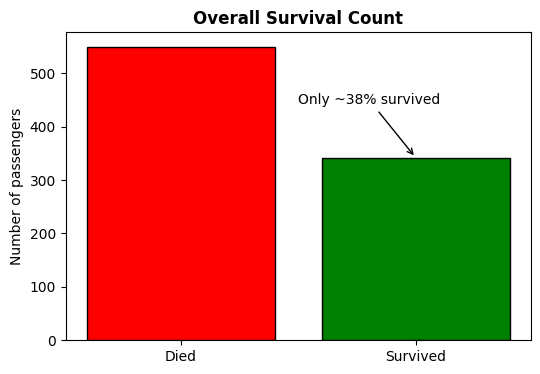

In [23]:
# Count total number of survivors (1) and non-survivors (0)
survival_counts = df['Survived'].value_counts()

# Create a new figure with specified size
plt.figure(figsize=(6,4))

# Plot a bar chart with two categories: Died and Survived
plt.bar(['Died', 'Survived'], survival_counts.values,
        color=['red', 'green'], edgecolor='black')

# Axis label and chart title
plt.ylabel('Number of passengers')
plt.title('Overall Survival Count',fontweight='bold')

# Calculate survival percentage
survived = round(survival_counts[1] / (survival_counts[0] + survival_counts[1]) * 100)

# Add annotation with arrow pointing to the 'Survived' bar
plt.annotate(f"Only ~{survived}% survived",
             xy=(1, survival_counts[1]),                  # point to 'Survived' bar top
             xytext=(0.5, survival_counts[1] + 100),      # place annotation above bar
             arrowprops=dict(facecolor='black', arrowstyle="->"))  # draw arrow

# Show the bar chart
plt.show()


The bar chart depicts the overall survival distribution of passengers aboard the Titanic. <u>**Analysis shows that approximately 38% of passengers survived, while 62% did not.**</u> This indicates that the majority of passengers were unable to survive the disaster, providing a clear overview of the survival outcomes in the dataset.

# Gender Distribution

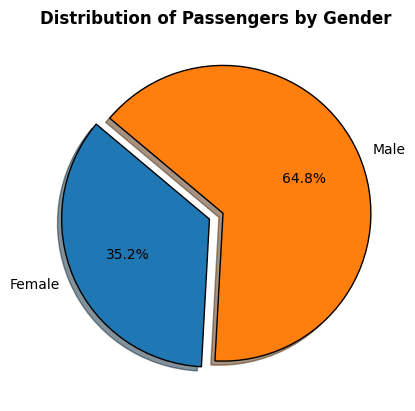

In [24]:
gender_count = df.groupby('Sex').size()

colors = ['#1f77b4', '#ff7f0e']  # blue for male, orange for female
explode = (0.05, 0.05)  # slight separation of slices

plt.pie(
    gender_count.values,
    labels=gender_count.index.str.title(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor':'black'}
)
plt.title('Distribution of Passengers by Gender',fontweight='bold')

plt.show()

The pie chart illustrates the distribution of passengers on the Titanic by gender. Analysis reveals that <u>**males accounted for approximately 64.8% of the passengers, while females represented 35.2%.**</u> This visualization provides a clear overview of the gender composition in the dataset, an important factor to consider in further exploratory data analysis.

# Survival by Gender

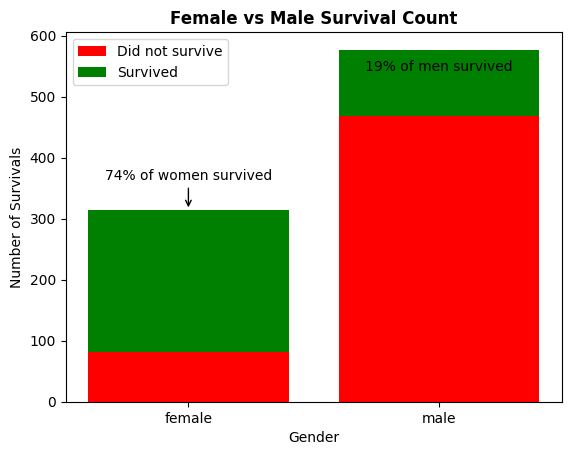

In [25]:
# Group the data by Sex and Survived, count each group, and reshape with unstack
survival_gender = df.groupby(["Sex", "Survived"]).size().unstack()
survival_gender   # DataFrame with survival counts split by gender

male_survived_per = round(survival_gender.loc['male',1]/ survival_gender.loc['male'].sum()*100)
female_survived_per = round(survival_gender.loc['female',1]/ survival_gender.loc['female'].sum()*100)


# Create numeric positions for each gender (female=0, male=1)
x = np.arange(len(survival_gender))

# Plot the 'Did not survive' counts in red
plt.bar(x, survival_gender[0], color='red', label='Did not survive')

# Plot the 'Survived' counts in green, stacked on top of the previous bars
plt.bar(x, survival_gender[1], color='green', bottom=survival_gender[0], label='Survived')

# Replace numeric x-ticks (0,1) with gender labels (female, male)
plt.xticks(x, survival_gender.index)

# Axis labels and chart title
plt.xlabel('Gender')
plt.ylabel('Number of Survivals')
plt.title('Female vs Male Survival Count',fontweight='bold')


plt.annotate(f'{female_survived_per}% of women survived',
             xy=(0, survival_gender.loc['female'].sum()),      # top of female bar
             xytext=(0, survival_gender.loc['female'].sum()+50), # slightly above
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             ha='center')

plt.annotate(f'{male_survived_per}% of men survived',
             xy=(1, survival_gender.loc['male'].sum()),        # top of male bar
             xytext=(1, survival_gender.loc['male'].sum()-35), # slightly above
             ha='center')


# Add legend for colors
plt.legend()

# Show the final stacked bar chart
plt.show()


The stacked bar chart illustrates the survival distribution of Titanic passengers by gender. <u>**Among female passengers, approximately 74% survived, whereas only 19% of male passengers survived.**</u> This highlights a significant disparity in survival rates between genders, indicating that gender was a strong factor influencing survival outcomes.

# Passenger Distribution by Class

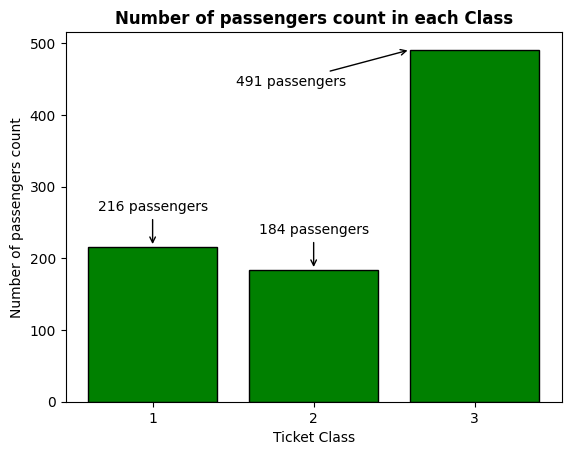

In [26]:
# Count number of passengers in each class
passengers_count = df.groupby('Pclass').size()

# Generate x positions for the bars (0,1,2)
x = np.arange(len(passengers_count))

# Plot bar chart
# - color='green' gives the bars a green fill
# - edgecolor='black' adds a black border around each bar for clarity
plt.bar(x, passengers_count.values, color='green', edgecolor='black')

# Set x-axis labels to the actual passenger classes (1,2,3)
plt.xticks(x, passengers_count.index)

# Add title and axis labels
plt.title('Number of passengers count in each Class',fontweight='bold')
plt.xlabel('Ticket Class')
plt.ylabel('Number of passengers count')

# Annotate each bar with its passenger count
# Class 1
plt.annotate(f'{passengers_count.loc[1]} passengers',  # text to display
             xy=(0, passengers_count.loc[1]),          # point to annotate (top of the bar)
             xytext=(0, passengers_count.loc[1]+50),   # position of text
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # arrow pointing to bar
             ha='center')                               # horizontal alignment of text

# Class 2
plt.annotate(f'{passengers_count.loc[2]} passengers',
             xy=(1, passengers_count.loc[2]),
             xytext=(1, passengers_count.loc[2]+50),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             ha='center')

# Class 3
plt.annotate(f'{passengers_count.loc[3]} passengers',
             xy=(1.6, passengers_count.loc[3]),         # slightly off x to align with bar
             xytext=(1.2, passengers_count.loc[3]-50), # position text above/beside bar
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             ha='right')

# Display the plot
plt.show()


This bar chart shows the distribution of passengers across the three ticket classes. <u>**Class 1 has 216 passengers, Class 2 has 184 passengers, and Class 3 has the highest count with 491 passengers.**</u>  The bars are annotated with the exact counts, making it easy to see that most passengers were in Class 3, followed by Class 1 and Class 2. The green bars with black edges provide a clear and readable visualization.

# Survival by Class

In [27]:
survival_class = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


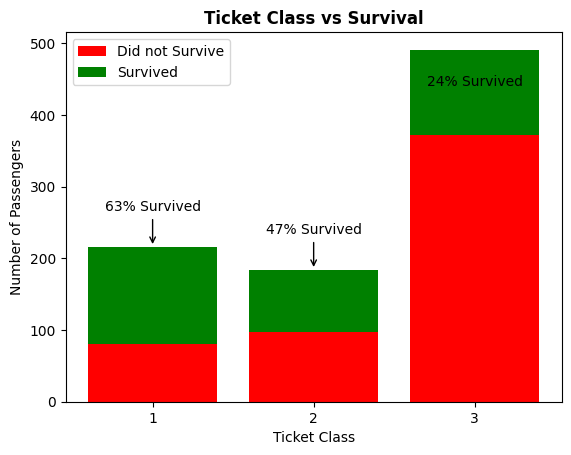

In [28]:
survival_class = df.groupby(['Pclass', 'Survived']).size().unstack()

x = np.arange(len(survival_class))

# Percentages
class_1_survival_per = round(survival_class.loc[1,1] / survival_class.loc[1].sum()*100)
class_2_survival_per = round(survival_class.loc[2,1] / survival_class.loc[2].sum()*100)
class_3_survival_per = round(survival_class.loc[3,1] / survival_class.loc[3].sum()*100)

x = np.arange(len(survival_class))

# Plot stacked bar chart
plt.bar(x, survival_class[0], color='red', label='Did not Survive')
plt.bar(x, survival_class[1], bottom=survival_class[0], color='green', label='Survived')

plt.xlabel("Ticket Class")
plt.ylabel("Number of Passengers")
plt.title('Ticket Class vs Survival',fontweight='bold')
plt.xticks(x, survival_class.index)


plt.annotate(f'{class_1_survival_per}% Survived',
             xy=(0, survival_class.loc[1].sum()),
             xytext=(0, survival_class.loc[1].sum()+50),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             ha='center')

plt.annotate(f'{class_2_survival_per}% Survived',
             xy=(1, survival_class.loc[2].sum()),
             xytext=(1, survival_class.loc[2].sum()+50),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             ha='center')

plt.annotate(f'{class_3_survival_per}% Survived',
             xy=(2,survival_class.loc[3].sum()),
             xytext = (2, survival_class.loc[3].sum()-50),
             ha='center'

)
plt.legend()
plt.show()

This chart shows Titanic passenger survival rates by class. <u>**First class passengers had the highest survival rate at 63%, second class at 47%, and third class at only 24%.**</u> Third class had the most passengers (nearly 500) but the lowest chance of survival. The data reveals clear class-based disparities in survival outcomes during the disaster.

# Age Distribution

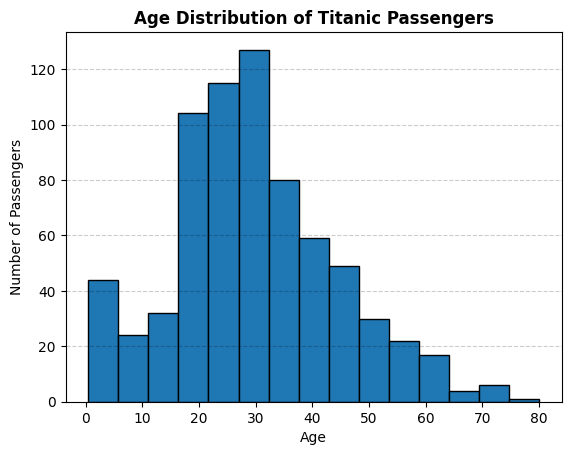

In [29]:
# Drop missing age values
age_data = df['Age'].dropna()

# Create histogram
# plt.figure(figsize=(8,6))
plt.hist(age_data, bins=15, color='#1f77b4', edgecolor='black')  # blue bars
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers',fontweight='bold')
plt.grid(axis='y',linestyle='--',alpha=0.2,color='black')
plt.show()

The histogram displays the age distribution of Titanic passengers. <u>**Most passengers were between 20 and 40 years old, with fewer children and elderly passengers.**</u> This visualization provides insight into the age composition of the dataset, an important factor to consider in survival analysis.

The age distribution is slightly right-skewed, with most passengers aged 20–40 and a smaller number of older passengers.


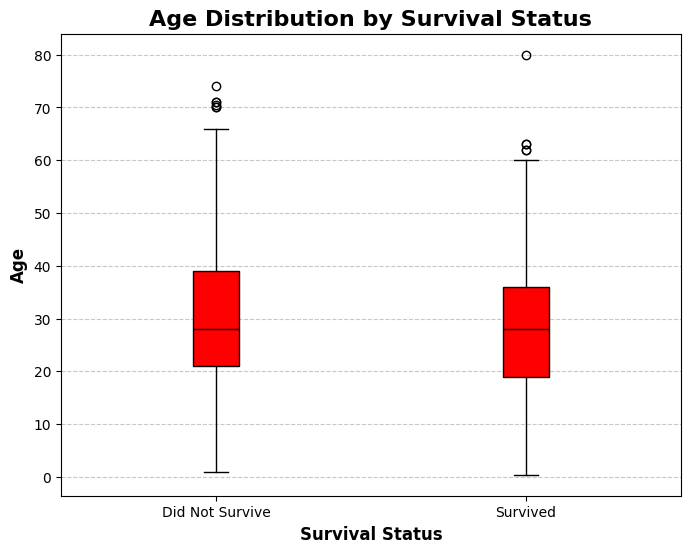

In [30]:
# Drop missing ages
df = df.dropna(subset=['Age', 'Survived'])

# Prepare data for each group
not_survived_ages = df[df['Survived'] == 0]['Age']
survived_ages = df[df['Survived'] == 1]['Age']

# ✅ Create boxplot
plt.figure(figsize=(8,6))
plt.boxplot(
    [not_survived_ages, survived_ages],
    tick_labels=['Did Not Survive', 'Survived'],
    patch_artist=True,
    boxprops=dict(facecolor='red', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Labels and title
plt.xlabel('Survival Status', fontweight='bold', fontsize=12)
plt.ylabel('Age', fontweight='bold', fontsize=12)
plt.title('Age Distribution by Survival Status', fontweight='bold', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ✅ This line is essential to display the plot
plt.show()

The box plot compares the age distribution of Titanic passengers by survival status. It visualizes key statistics such as the median, interquartile range, and outliers, allowing a clear comparison between survivors and non-survivors. The plot shows that both groups have similar median ages and overlapping age distributions,<u> **indicating that age alone did not strongly determine survival.**</u> However, it highlights the presence of passengers from a wide range of age groups in both categories.

# Fare Distribution

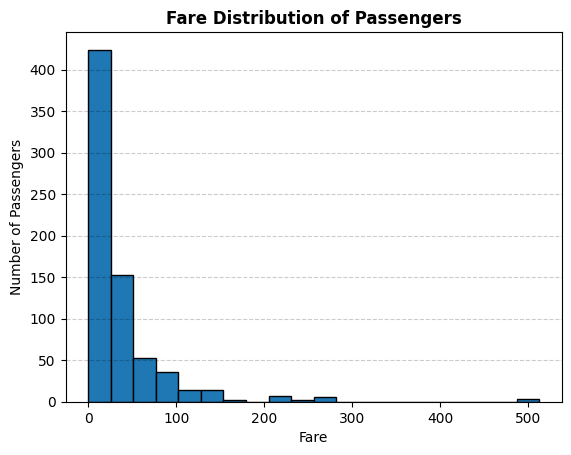

In [31]:
# Drop missing values from the 'Fare' column to ensure clean data for plotting
fare = df['Fare'].dropna()

# Create a histogram to visualize the distribution of ticket fares
plt.hist(fare, bins=20, color='#1f77b4', edgecolor='black')

# Label the x-axis as 'Fare'
plt.xlabel('Fare')

# Label the y-axis as 'Number of Passengers'
plt.ylabel('Number of Passengers')

# Add a horizontal grid to improve readability of bar heights
plt.grid(axis='y', linestyle='--', color='black', alpha=0.2)

# Add a bold title describing the plot
plt.title('Fare Distribution of Passengers', fontweight='bold')

# Display the plot
plt.show()

This histogram shows the distribution of passenger fares, with most passengers paying less than 50 units. The frequency drops sharply as fares increase, indicating that high fares were rare. This right-skewed pattern demonstrates that only a few passengers paid much higher amounts, possibly for premium accommodations. Overall, the chart highlights the large gap between common and luxury ticket prices within the dataset

# Affect of Fare on Survival

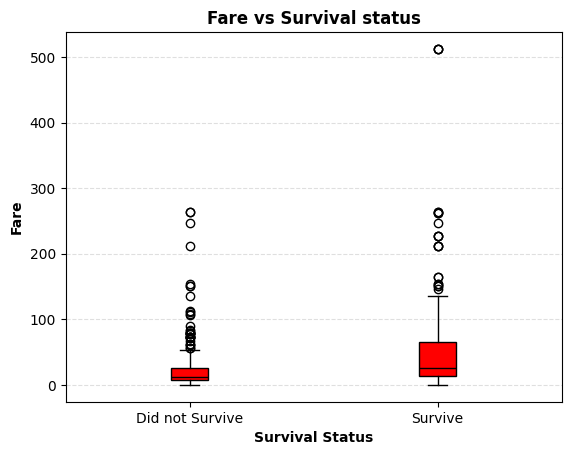

In [32]:
# Drop rows with missing values in 'Fare' or 'Survived' columns to avoid errors
df = df.dropna(subset=['Fare','Survived'])

# Separate fares for non-survivors and survivors
not_survived = df[df['Survived']==0]['Fare']
survived = df[df['Survived']==1]['Fare']

# Create a box plot comparing fare distributions between survivors and non-survivors
plt.boxplot( [not_survived,survived],
            tick_labels=['Did not Survive', 'Survive'],
             patch_artist=True,
             boxprops=dict(facecolor='red', color='black'),
             medianprops = dict(color='black'),
             whiskerprops=dict(color='black'),
             capprops=dict(color='black')
)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Label axes and set title with bold formatting
plt.xlabel('Survival Status', fontweight='bold')
plt.ylabel('Fare', fontweight='bold')
plt.title('Fare vs Survival status', fontweight='bold')
plt.show()

The box plot compares the fare distribution of Titanic passengers based on survival status. </u>**Survivors generally paid higher fares on average, as indicated by the higher median and wider spread of the 'Survived' group.**</u> This suggests that passengers who paid more — often associated with higher-class accommodations — had better chances of survival. The presence of significant outliers also indicates that a small number of passengers paid substantially higher fares, further highlighting class-based disparities in survival outcomes.

# Embarked Count

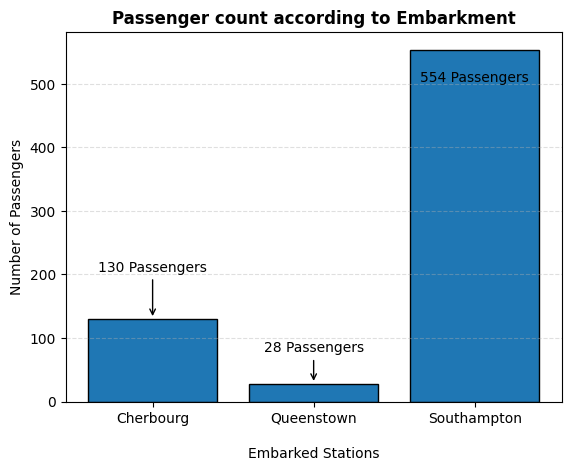

In [33]:
embarked = df.groupby('Embarked').size()
x = np.arange(len(embarked))
plt.bar(x, embarked.values, color='#1f77b4', edgecolor='black')
label = ['Cherbourg','Queenstown','Southampton']

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xlabel('\nEmbarked Stations')
plt.ylabel('Number of Passengers')
plt.title('Passenger count according to Embarkment', fontweight='bold')
plt.xticks(x,label)

plt.annotate(f'{embarked.loc["C"]} Passengers',
             xy=(0,embarked.loc['C']),
             xytext=(0,embarked.loc['C']+75),
            ha='center',
            arrowprops = dict(color='black', arrowstyle="->") )

plt.annotate(f'{embarked.loc["Q"]} Passengers',
             xy=(1,embarked.loc["Q"]),
             xytext=(1,embarked.loc["Q"]+50),
             ha='center',
             arrowprops=dict(color='black', arrowstyle="->"))


plt.annotate(f'{embarked.loc["S"]} Passengers',
             xy=(2,embarked.loc["S"]),
             xytext=(2,embarked.loc["S"]-50),
             ha='center')



plt.show()

The bar chart shows the distribution of passengers according to their embarkation stations on the Titanic. The majority of passengers, 554, boarded at Southampton (S), followed by 130 at Cherbourg (C) and 28 at Queenstown (Q). This visualization highlights the significant variation in passenger numbers across different embarkation points, which may reflect differences in departure ports and class composition of passengers.

# Survival by Embarked

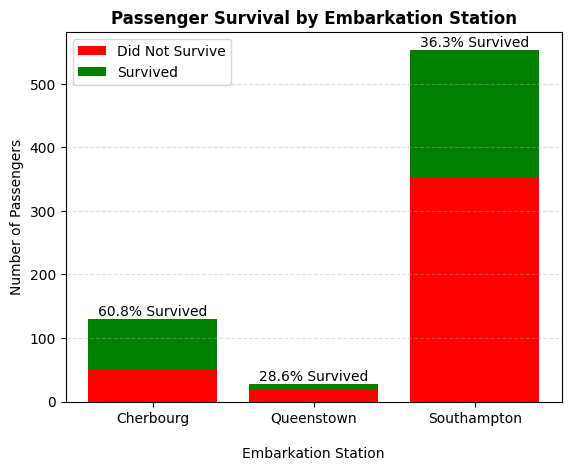

In [34]:
# Group by 'Embarked' and 'Survived'
survival_embarked = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Calculate survival percentages for each embarkation station
surv_perc = (survival_embarked[1] / survival_embarked.sum(axis=1) * 100).round(1)


# Calculate survival percentages for each embarkation station
surv_perc = (survival_embarked[1] / survival_embarked.sum(axis=1) * 100).round(1)

# Numeric x positions for bars
x = np.arange(len(survival_embarked))
label = ['Cherbourg','Queenstown','Southampton']

# Plot stacked bar chart
plt.bar(x, survival_embarked[0], color='red', label='Did Not Survive')
plt.bar(x, survival_embarked[1], bottom=survival_embarked[0], color='green', label='Survived')

# Labels, title, and x-ticks
plt.xlabel('\nEmbarkation Station')
plt.ylabel('Number of Passengers')
plt.title('Passenger Survival by Embarkation Station', fontweight='bold')
plt.xticks(x, label)

# Annotate survival percentages above each bar
for i, perc in enumerate(surv_perc):
    plt.annotate(f'{perc}% Survived',
                 xy=(i, survival_embarked.iloc[i].sum()),
                 xytext=(i, survival_embarked.iloc[i].sum()+5),
                 ha='center'
                 )

# Legend
plt.legend()

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show plot
plt.show()

Exploratory analysis of survival by embarkation station reveals that passengers boarding at Cherbourg (C) had the highest survival rate, while those from Queenstown (Q) had the lowest. Southampton (S) carried the majority of passengers, but its survival rate was moderate. This suggests that embarkation location, likely correlated with passenger class and socio-economic status, had a noticeable impact on survival outcomes.

# gender,class vs survival

In [35]:
gc=df.groupby(['Sex','Pclass','Survived']).size().unstack()
gc

Survived         0   1
Sex    Pclass         
female 1         3  82
       2         6  68
       3        55  47
male   1        61  40
       2        84  15
       3       215  38

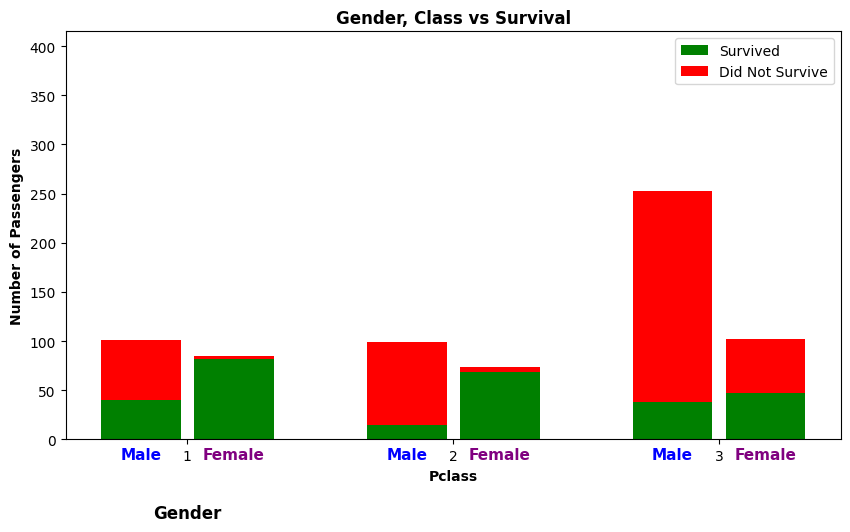

In [59]:
classes = [1, 2, 3]
bar_width = 0.35
x = np.arange(len(classes))

plt.figure(figsize=(10,6))

# Male: Survived (bottom) + Did Not Survive (top)
plt.bar(x - bar_width/2,
        [gc.loc[('male', c), 1] for c in classes],
        color='green',
        width=0.30)

plt.bar(x - bar_width/2,
        [gc.loc[('male', c), 0] for c in classes],
        bottom=[gc.loc[('male', c), 1] for c in classes],
        color='red',
        width=0.30)

# Female: Survived (bottom) + Did Not Survive (top)
plt.bar(x + bar_width/2,
        [gc.loc[('female', c), 1] for c in classes],
        color='green',
        label='Survived',
        width=0.30)

plt.bar(x + bar_width/2,
        [gc.loc[('female', c), 0] for c in classes],
        bottom=[gc.loc[('female', c), 1] for c in classes],
        color='red',
        label='Did Not Survive',
        width=0.30)

# ✅ Add gender labels below each group
for i, cls in enumerate(classes):
    plt.text(x[i] - bar_width/2, -20, 'Male', ha='center', fontsize=11, fontweight='bold', color='blue')
    plt.text(x[i] + bar_width/2, -20, 'Female', ha='center', fontsize=11, fontweight='bold', color='purple')

# ✅ Draw a small bracket-style annotation to indicate which side is which (optional but nice)
plt.annotate("",
             xy=(x[0] - bar_width, -50), xytext=(x[0] + bar_width, -50),
             arrowprops=dict(arrowstyle='-[,widthB=4.5', lw=2, color='black'))
plt.text(x[0], -80, "Gender", ha='center', fontsize=12, fontweight='bold')

# Axis labels and title
plt.xticks(x, classes)
plt.xlabel('Pclass', fontweight='bold')
plt.ylabel('Number of Passengers', fontweight='bold')
plt.title('Gender, Class vs Survival', fontweight='bold')
plt.legend()

# Adjust limits so text below is visible
plt.ylim(0, gc.values.max() + 200)

plt.subplots_adjust(bottom=0.2)

plt.show()


Survival outcomes on the Titanic varied significantly by both gender and passenger class. Female passengers consistently had higher survival rates across all classes, with first-class women showing the highest survival (over 96%). In contrast, male passengers had substantially lower survival rates in every class, especially in third class, where the vast majority did not survive. This highlights that both gender and socioeconomic status (represented by ticket class) played a major role in determining survival chances.